**Descrição do exercício:**
> Crie uma classe que modela um polinômio do tipo c0 + c1*x + c2*x^2 + … + cN*x^N .
Os usuários serão estudantes de engenharia e ciências da computação que querem resolver exercícios de álgebra. 
A entrada são os N coeficientes em ordem crescente de potência. 
Os usuários precisarão acessar o grau do polinômio, avaliar o resultado para dado valor de x, somar e multiplicar dois polinômios.
--- Desafio: Implemente um método que plota o polinômio para um dado intervalo de entrada.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
class Polinomio:
    def __init__(self, array_coeficientes):
        self.__array_coeficientes = array_coeficientes

    @property
    def array_coeficientes(self):
        return self.__array_coeficientes

    @array_coeficientes.setter
    def array_coeficientes(self, new_array_coeficientes):
        self.__array_coeficientes = new_array_coeficientes
        
    def __CheckListaVazia(self):
        if all(self.array_coeficientes) == 0 or not self.array_coeficientes:
            print('Polinomio de grau nulo!')
            return True

    def VizualizarPolinomio(self):
        # c0 + c1*x + c2*x^2 + … + cN*x^N
        string_polinomio = ''
        for i, coeficiente in enumerate(self.array_coeficientes):
            if i == 0:
                string_polinomio += f'{coeficiente}'
            elif coeficiente == 0:
                continue
            else:
                if coeficiente > 0:
                    string_polinomio += f' + {coeficiente}'
                else:
                    string_polinomio += f' - {abs(coeficiente)}'
                if i == 1:
                    string_polinomio += 'x'
                else:
                    string_polinomio += f'x^{i}'
        return f'[{string_polinomio}]'

    def RetornaGrau(self):
        print('# Grau: ', end='')
        if self.__CheckListaVazia():
            return

        print(len(self.array_coeficientes) - 1)
        return len(self.array_coeficientes)-1

    def ResultadoPolinomio(self, x):
        print(f'# Resultado: ', end='')
        if self.__CheckListaVazia():
            return

        resultado = 0
        for i, coeficiente in enumerate(self.array_coeficientes):
            resultado += coeficiente*(x**i)
    
        print(f'P(x) = {self.VizualizarPolinomio()} -> P({x}) = {resultado}')
        return resultado

    def SomarPolinomio(self, polinomio):
        diferenca_tamanho = len(self.array_coeficientes) - len(polinomio.array_coeficientes)
        if diferenca_tamanho > 0:
            for i in range(diferenca_tamanho):
                polinomio.array_coeficientes.append(0)
        elif diferenca_tamanho < 0:
            for i in range(diferenca_tamanho*-1):
                self.array_coeficientes.append(0)

        print(f'# Soma: {self.VizualizarPolinomio()} + {polinomio.VizualizarPolinomio()}', end='')
        self.array_coeficientes = [x + y for x, y in zip(self.array_coeficientes, polinomio.array_coeficientes)]
        print(f' = {self.VizualizarPolinomio()}')

    def MultiplicarPolinomio(self, polinomio):
        # (c0 + c1*x) * (c0 + c1*x) = c0^2 + 2*c0*c1*x + c1^2*x^2
        # (1 + 2x^1) * (1 + 2x^1) = 1 * 1 + 1 * 2 x^1 + 2x^1 * 1 + 2x^1 * 2x^1 = 1 + 4x^1 + 4x^2
        p1 = self.array_coeficientes[::-1]
        p2 = polinomio.array_coeficientes[::-1]

        print(f'# Multiplicação: {self.VizualizarPolinomio()} * {polinomio.VizualizarPolinomio()}', end='')
        self.array_coeficientes = list(np.polynomial.polynomial.polymul(p1, p2))[::-1]
        print(f' = {self.VizualizarPolinomio()}')
    
    def Plot(self, x_range):
        x = np.linspace(x_range[0], x_range[1], 100)
        y = np.polyval(self.array_coeficientes[::-1], x)
        plt.plot(x, y)
        plt.show()

# Exercicio 3 - Polinomio
# Grau: Polinomio de grau nulo!
# Resultado: Polinomio de grau nulo!
# Soma: [0] + [1 + 2x] = [1 + 2x]
# Multiplicação: [0] * [1 + 2x] = [0.0]
# Polinomio p1: [1 + 2x]


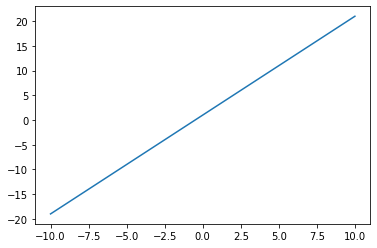

In [99]:
print('# Exercicio 3 - Polinomio')
p1 = Polinomio([0,0])
p2 = Polinomio([0,0])
p3 = Polinomio([1,2])

p1.RetornaGrau()
p1.ResultadoPolinomio(2)
p1.SomarPolinomio(p3)
p2.MultiplicarPolinomio(p3)

print(f'# Polinomio p1: {p1.VizualizarPolinomio()}')
p1.Plot([-10, 10])